# Flights in the United States
## by Benoît Courty

## Preliminary Wrangling

This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008.

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
def pv(variable):
    if(len(variable)>1): print(variable, ":", eval(variable))

Note :
    https://blog.hugo-larcher.com/flight-data-visualisation-with-pandas-and-matplotlib-ebbd13038647 : Affichage des trajets des avions.
            => Flight with most delay for exemple.
           
Affichage de ville sur la carte :
https://gis.stackexchange.com/questions/198530/plotting-us-cities-on-a-map-with-matplotlib-and-basemap
/!\ Nécessite Basemap, qui ne s'intalle pas faccilement avec Pip :(

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

### Downloading the datasets

The dataset consisist of a file per year.

We will look over a list of availiable years and download the files.

Source : 
http://stat-computing.org/dataexpo/2009/1987.csv.bz2

In [3]:
import os
import requests
folder_name = "./"

def download_files(folder_name):
    years = []
    for year in range(1987, 2008):
        years.append(year)  
        url = "http://stat-computing.org/dataexpo/2009/" + str(year) + ".csv.bz2"
        filename = url.split('/')[-1]
        response = requests.get(url)
        with open(os.path.join(folder_name, filename), mode='wb') as file:
            file.write(response.content)
    print("Files retreived !")
    return years

years = []
#years = download_files(folder_name)
print(years)

[]


### Loading the dataset

In [4]:
import pandas as pd


years = ['2006']
df = pd.DataFrame()
for year in years:
    datafilename = folder_name + year + '.csv.bz2'
    print(datafilename)
    df_temp = pd.read_csv(datafilename)
    df = pd.concat([df, df_temp])


./2006.csv.bz2


Get a rapid overview of it.

In [5]:
df.head(3)
df.tail(3)
df.columns
df.dtypes
df.describe()
df.info()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,NaN,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,NaN,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,NaN,0,0,0,0,0,0


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
7141919,2006,12,29,5,2118.0,2115,2254.0,2241,DL,1676,...,9,27,0,NaN,0,0,0,0,0,0
7141920,2006,12,29,5,2122.0,2127,2209.0,2223,DL,1677,...,5,21,0,NaN,0,0,0,0,0,0
7141921,2006,12,29,5,2042.0,2045,2213.0,2235,DL,1678,...,5,15,0,NaN,0,0,0,0,0,0


Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn                 int64
TaxiOut                int64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay           int64
WeatherDelay           int64
NASDelay               int64
SecurityDelay          int64
LateAircraftDelay      int64
dtype: object

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7141922.0,7.141922e+06,7.141922e+06,7.141922e+06,7.019988e+06,7.141922e+06,7.003802e+06,7.141922e+06,7.141922e+06,7.003802e+06,...,7.141922e+06,7.141922e+06,7.141922e+06,7.141922e+06,7.141922e+06,7.141922e+06,7.141922e+06,7.141922e+06,7.141922e+06,7.141922e+06
mean,2006.0,6.562766e+00,1.573063e+01,3.949934e+00,1.340392e+03,1.332248e+03,1.486921e+03,1.495765e+03,2.186765e+03,1.260601e+02,...,7.279974e+02,7.061624e+00,1.574530e+01,1.707300e-02,2.266337e-03,3.396186e+00,6.796270e-01,3.585970e+00,3.099600e-02,4.515005e+00
std,0.0,3.424931e+00,8.786689e+00,1.991913e+00,4.765090e+02,4.625505e+02,5.008019e+02,4.786718e+02,1.989384e+03,7.131959e+01,...,5.745307e+02,3.112340e+01,1.127117e+01,1.295435e-01,4.755208e-02,1.880046e+01,8.492678e+00,1.562795e+01,1.277919e+00,1.986008e+01
min,2006.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2006.0,4.000000e+00,8.000000e+00,2.000000e+00,9.300000e+02,9.300000e+02,1.110000e+03,1.115000e+03,5.840000e+02,7.500000e+01,...,3.160000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2006.0,7.000000e+00,1.600000e+01,4.000000e+00,1.330000e+03,1.325000e+03,1.516000e+03,1.519000e+03,1.493000e+03,1.070000e+02,...,5.740000e+02,5.000000e+00,1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2006.0,1.000000e+01,2.300000e+01,6.000000e+00,1.732000e+03,1.720000e+03,1.911000e+03,1.906000e+03,3.442000e+03,1.560000e+02,...,9.560000e+02,8.000000e+00,1.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2006.0,1.200000e+01,3.100000e+01,7.000000e+00,2.930000e+03,2.359000e+03,2.955000e+03,2.359000e+03,9.619000e+03,1.879000e+03,...,4.962000e+03,1.501000e+03,6.020000e+02,1.000000e+00,1.000000e+00,1.666000e+03,1.163000e+03,1.392000e+03,3.540000e+02,1.366000e+03


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7141922 entries, 0 to 7141921
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              int64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         int64
WeatherDelay         int64
NASDelay             int64
SecurityDelay        int64
LateAircraftDelay    int64
dtypes: float64(7), int64(17), object(5)
memory usage: 1.5+ GB


In [6]:
def explore_value(df):
    to_be_removed = []
    columns = df.columns
    for column in columns:
        nb_unique_values = eval('df.' + column + '.nunique()')
        #print("Distinct values in", column, ":", nb_unique_values)
        if nb_unique_values > 10:
            to_be_removed.append(column)
    columns_redux = [item for item in columns if item not in to_be_removed ]
    
    #print(columns_redux)
    for column in columns_redux:
        
        code = 'df.' + column + '.value_counts()'
        print("Distinct values in", column, ':', code)
        print(eval(code))

explore_value(df)

Distinct values in Year : df.Year.value_counts()
2006    7141922
Name: Year, dtype: int64
Distinct values in DayOfWeek : df.DayOfWeek.value_counts()
5    1056606
4    1052949
1    1048054
3    1042952
2    1030322
7    1011508
6     899531
Name: DayOfWeek, dtype: int64
Distinct values in Cancelled : df.Cancelled.value_counts()
0    7019988
1     121934
Name: Cancelled, dtype: int64
Distinct values in CancellationCode : df.CancellationCode.value_counts()
A    55655
B    37913
C    28209
D      157
Name: CancellationCode, dtype: int64
Distinct values in Diverted : df.Diverted.value_counts()
0    7125736
1      16186
Name: Diverted, dtype: int64


https://www.transtats.bts.gov/FieldInfo.asp?Field_Desc=Specifies%20The%20Reason%20For%20Cancellation&Field_Type=Char&Lookup_Table=L_CANCELLATION&Table_ID=236&SYS_Table_Name=T_ONTIME_REPORTING&Sys_Field_Name=CANCELLATION_CODE

    Code	Description
    A	Carrier
    B	Weather
    C	National Air System
    D	Security

    If Cancelled==1 it mean the flight has been canceled
    If Diverted==1 it mean the flight has been delayed

    Variable descriptions from http://stat-computing.org/dataexpo/2009/the-data.html
        Name 	Description
    1 	Year 	1987-2008
    2 	Month 	1-12
    3 	DayofMonth 	1-31
    4 	DayOfWeek 	1 (Monday) - 7 (Sunday)
    5 	DepTime 	actual departure time (local, hhmm)
    6 	CRSDepTime 	scheduled departure time (local, hhmm)
    7 	ArrTime 	actual arrival time (local, hhmm)
    8 	CRSArrTime 	scheduled arrival time (local, hhmm)
    9 	UniqueCarrier 	unique carrier code
    10 	FlightNum 	flight number
    11 	TailNum 	plane tail number
    12 	ActualElapsedTime 	in minutes
    13 	CRSElapsedTime 	in minutes
    14 	AirTime 	in minutes
    15 	ArrDelay 	arrival delay, in minutes
    16 	DepDelay 	departure delay, in minutes
    17 	Origin 	origin IATA airport code
    18 	Dest 	destination IATA airport code
    19 	Distance 	in miles
    20 	TaxiIn 	taxi in time, in minutes
    21 	TaxiOut 	taxi out time in minutes
    22 	Cancelled 	was the flight cancelled?
    23 	CancellationCode 	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
    24 	Diverted 	1 = yes, 0 = no
    25 	CarrierDelay 	in minutes
    26 	WeatherDelay 	in minutes
    27 	NASDelay 	in minutes
    28 	SecurityDelay 	in minutes
    29 	LateAircraftDelay 	in minutes


In [7]:
df.query("CarrierDelay > 0 and WeatherDelay > 0")[['CarrierDelay', 'WeatherDelay']][:10]

,CarrierDelay,WeatherDelay
571,10,35
905,10,83
942,3,19
1021,5,7
3109,5,5
3304,5,65
3340,4,6
3401,5,9
3896,3,7
17002,5,10


### What is the structure of your dataset?

As stated on http://stat-computing.org/dataexpo/2009/ :
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed. 

The data come from the US Bureau of Transportation Statistics.

The dataset is a series of CSV containing one line per flight in the US. With 29 informations about the fligth : origin, destination, date, reason of delay, take off time... Mainly numerical. Some of them are continuous (delay) and others categorical (month).

It's only the internal US fligth, not the international fligth arriving/living the US.

It's already a huge file with millions of lines just for one year.

The file are compressed in BZ2 and it was an happy surprise that Pandas could directly load it.

We are also provided with a description of every columns : https://www.transtats.bts.gov/Fields.asp?Table_ID=236



### What is/are the main feature(s) of interest in your dataset?

We could use this dataset for many things, but I will focus on exploring the flight delay.

So the main feature will be the ArrDelay columns that containt the difference in minutes between planed arrival time and actual arrival time.

I will also explore cancelled and diverted flight as it is an inconvenient for passengers.

> Are there certain destination or arrival cities that are home to more delays or cancellations?

- Evolution of delay type over time
- Airport that are more subject to delay ?
- More security delay after 11 september 2001 ?
- What root cause lead to more delay in terme of time.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Well, almost all column could have a corelation with delay. For exemple maybe night flight have more delay, or sunday flight, on february flight, or flights from a specific carrier or specific airport...

We even have the Tail Number (the ID of the plane) to check if a specific aircraft has more delay than others.

I  will quickly have look to correlation, then investigate the one that seems more revelant.

We have many years so we could also look at changes between years.

'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'


Delay cause
Airport
Carrier
Delay time
Day of week
Month in case of 


Build categorical variable for :
- on_time
- Small_wait
- Medium_Wait
- Huge Wait
- delayed
- diverted
- canceled


## Tidy

I was thinking of merging CarrierDelay, WeatherDelay, NASDelay, SecurityDelay and LateAircraftDelay in one column, with another with the reason.

But there could be many delay for the same flight.

Time of day like CRSDepTime are in hhmm format. That's not cleen because we can't make reliable operation on it. If we want to compute difference in time to get the delay for exemple.

1905 - 1855 = 50 but it's only 10 minutes

To get it clean it will be best to convert it in minutes. We will see if we need it.


In [8]:
1905 - 1855

50

Year, Month, Total_flight, nb_low_delay, nb_medium, nb_hight, avg_delay
=> TRop compliqué

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [9]:
pv("df['ArrDelay'].max()")
pv("df['ArrDelay'].min()")

df['ArrDelay'].max() : 1779.0
df['ArrDelay'].min() : -592.0


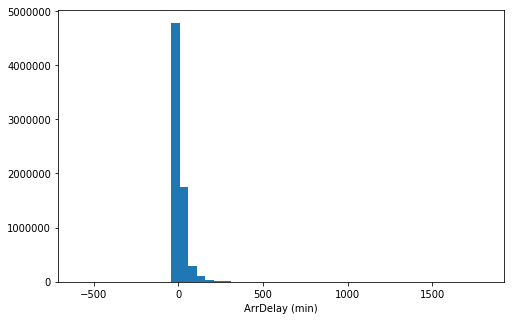

In [10]:
binsize = 50
bins = np.arange(df['ArrDelay'].min(), df['ArrDelay'].max()+binsize, binsize);
#print(bins)
plt.figure(figsize=[8, 5]);
plt.hist(data = df[np.isfinite(df['ArrDelay'])], x = 'ArrDelay', bins = bins);

plt.xlabel('ArrDelay (min)');
plt.show();


Huge spike aroud zero, so let's zoom around 0.

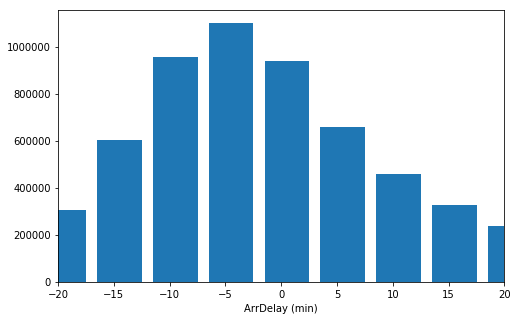

In [11]:
# Histogram plot
binsize = 5
bins = np.arange(df['ArrDelay'].min(), df['ArrDelay'].max()+binsize, binsize);
#print(bins)
plt.figure(figsize=[8, 5]);
plt.hist(data = df[np.isfinite(df['ArrDelay'])], x = 'ArrDelay', bins = bins, rwidth=0.8);
plt.xlabel('ArrDelay (min)');
plt.xticks(range(-30,30, binsize))
axes = plt.gca()
axes.set_xlim([-20,20])
plt.show();

The majority of planes landed early than expected.

There probably is a good reason for that, it's an interresting question to ask to a professional.


We first saw that the ArrDelay is right skewed with a slope with long tail that's look like a log distribution.

So let's have a look to the ArrDelay at log scale.

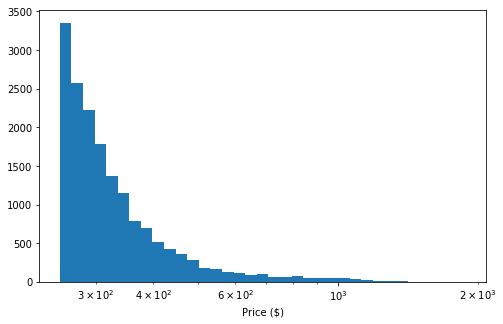

In [12]:

# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['ArrDelay'].max())+log_binsize, log_binsize)

# histogram on log scale. 
# Use non-equal bin sizes, such that they look equal on log scale.
# https://stackoverflow.com/questions/47850202/plotting-a-histogram-on-a-log-scale-with-matplotlib?rq=1
# logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))

plt.figure(figsize=[8, 5]);
plt.hist(data = df[np.isfinite(df['ArrDelay'])], x = 'ArrDelay', bins = bins);
plt.xscale('log');
#plt.xticks([500, 1e3, 2e3], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Price ($)');
plt.show();


Even at log scale, the delay time seems to derease rapidely.

The distribution still have the same shape. With many short delay and few long delay.

It's not surprising as it is what we have expected.

So let's have a look at huge delay to saw what they look like :

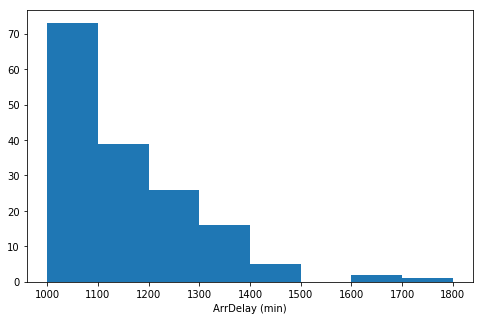

In [13]:
min_delay = 1000
df_hight_delay = df[np.isfinite(df['ArrDelay'])].query("ArrDelay > @min_delay")

binsize = 100
bins = np.arange(min_delay, df_hight_delay['ArrDelay'].max()+binsize, binsize);
plt.figure(figsize=[8, 5]);
plt.hist(data = df_hight_delay, x = 'ArrDelay', bins = bins);
plt.xlabel('ArrDelay (min)');
plt.show();


In [15]:
24*60
1800/60/24


1440

1.25

In [16]:
df[np.isfinite(df['ArrDelay'])].query("ArrDelay > 1200")[['Month', 'CRSDepTime', 'DepTime',
       'DepDelay',
       'CRSArrTime','ArrTime', 'ArrDelay', 'UniqueCarrier',  
       'ActualElapsedTime', 'CRSElapsedTime', 'Origin',  
       ]]

,Month,CRSDepTime,DepTime,DepDelay,CRSArrTime,ArrTime,ArrDelay,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,Origin
235471,1,1010,835.0,1345.0,1515,1324.0,1329.0,UA,529.0,545.0,ORD
943580,2,1234,1121.0,1367.0,2001,1843.0,1362.0,NW,262.0,267.0,LAX
1011007,2,1406,1128.0,1282.0,1844,1559.0,1275.0,AA,151.0,158.0,LAS
1024654,2,1424,1043.0,1219.0,1817,1443.0,1226.0,AA,180.0,173.0,JAC
1025197,2,932,831.0,1379.0,1241,1135.0,1374.0,AA,124.0,129.0,TUS
1520330,3,845,921.0,1476.0,1423,1429.0,1446.0,NW,188.0,218.0,SAN
1529333,3,1029,726.0,1257.0,1230,915.0,1245.0,NW,109.0,121.0,LGA
1536640,3,855,715.0,1340.0,1714,1526.0,1332.0,NW,311.0,319.0,ANC
1546257,3,1355,1723.0,1648.0,1728,2050.0,1642.0,NW,147.0,153.0,MSO
1548762,3,1405,1152.0,1307.0,1715,1503.0,1308.0,NW,131.0,130.0,EGE


In [17]:
df[np.isfinite(df['ArrDelay'])].query("ActualElapsedTime - CRSElapsedTime > 1500 ")[['Month', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier',  
       'ActualElapsedTime', 'CRSElapsedTime', 'ArrDelay',
       'DepDelay', 'Origin',  
       ]]

,Month,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin
1045418,2,139.0,2120,659.0,15,B6,1760.0,175.0,404.0,-1181.0,JFK


The hight delay flight seems real. But some of them are strange like the flight who take off with a small delay but arrived with a huge delay of many hours.
For exemple, it's impossible for a plane to flight 18 hours when only 76 minutes was expected at take off.

So we could supposed that the plane have landed on an another airport before going to the final airport.

Another strange behaviour at first look is when real departure time are before planed but with a huge positive delay : it means the plane has take off the day after it was expected.

I have found strange exemple but I think we could keep them because we have a huge dataset and the values are in an acceptable range.

In [18]:
flights_count = df.shape[0]
late_count = df[df['ArrDelay'] > 5].shape[0]
pv('flights_count')
pv('late_count')
pv('late_count/flights_count')

flights_count : 7141922
late_count : 2450079
late_count/flights_count : 0.3430559728879705


In [19]:
# 'Cancelled', 'CancellationCode', 'Diverted'
# Thanks to https://stackoverflow.com/questions/32633977/how-to-create-categorical-variable-based-on-a-numerical-variable

# Set the categorical variable values
arr_status = ['Unknown', 'Early', 'On Time', 'Small Delay',
              'Medium Delay' ,'Very late', 'Diverted', 'Cancelled']
# Set default value
df['ArrStatus'] = 'Unknown';
pd.Categorical(df.ArrStatus, categories=arr_status, ordered=True);
# Cancelled Flight
df.loc[(df['Cancelled'] == 1) , 'ArrStatus'] = 'Cancelled'
#df['ArrStatus'].value_counts()
# Cancelled Flight
df.loc[(df['Diverted'] == 1) , 'ArrStatus'] = 'Diverted'
#df['ArrStatus'].value_counts()
df.loc[(df['ArrDelay'] <= -15) , 'ArrStatus'] = 'Early'
df.loc[(df['ArrDelay'] > -15) , 'ArrStatus'] = 'On Time'
df.loc[(df['ArrDelay'] > 10) , 'ArrStatus'] = 'Small Delay'
df.loc[(df['ArrDelay'] > 30) , 'ArrStatus'] = 'Medium Delay'
df.loc[(df['ArrDelay'] > 90) , 'ArrStatus'] = 'Very late'
df['ArrStatus'].value_counts()
# Elegant solution but work only for value separation
# bins=[-float('Inf'),-15, 5, 30, 65, float('Inf')]
# df['ArrStatus'] = pd.cut(df['ArrDelay'], bins, labels=['Early', 'On Time', 'Small Delay', 'Medium Delay' ,'Very late'])



[Unknown, Unknown, Unknown, Unknown, Unknown, ..., Unknown, Unknown, Unknown, Unknown, Unknown]
Length: 7141922
Categories (8, object): [Unknown < Early < On Time < Small Delay < Medium Delay < Very late < Diverted < Cancelled]

On Time         4233292
Small Delay      989091
Early            848847
Medium Delay     688024
Very late        244548
Cancelled        121934
Diverted          16186
Name: ArrStatus, dtype: int64

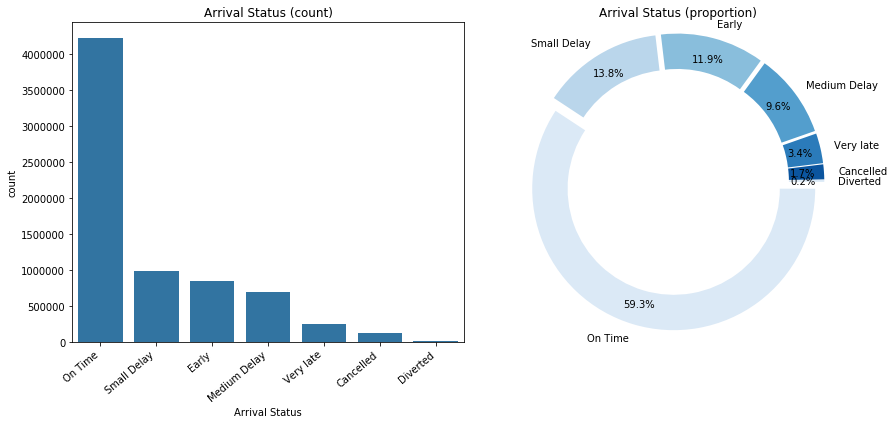

In [20]:
base_color = sns.color_palette()[0]
#sns.palplot(sns.color_palette("Blues"))

f,ax=plt.subplots(1,2,figsize=(13,6));
sns.countplot('ArrStatus',order = df['ArrStatus'].value_counts().index, data=df,ax=ax[0],
             color = base_color);
#plt.xticks(rotation = 90)
# Thanks to https://stackoverflow.com/questions/42528921/how-to-prevent-overlapping-x-axis-labels-in-sns-countplot
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right")
ax[0].set_title('Arrival Status (count)');
ax[0].set_xlabel('Arrival Status');

# Thanks to https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f
#explosion
explode = []
for i in range(len(df['ArrStatus'].value_counts())):
    explode.append(0.05)

df['ArrStatus'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],
                                       wedgeprops = {'width' : 0.25},
                                       startangle = 0,
                                       counterclock = False,
                                       colors = sns.color_palette("Blues"),
                                       pctdistance=0.85, explode = explode);


ax[1].set_title('Arrival Status (proportion)');
ax[1].set_ylabel('');
# Equal aspect ratio ensures that pie is drawn as a circle
ax[1].axis('equal')  
plt.tight_layout()
plt.show();


We learn that pie chart is not suited for too much bin, so let's group it a bit more.



In [21]:
df['ArrStatus_light'] = df['ArrStatus']

# Thanks to https://stackoverflow.com/questions/48345415/how-to-group-categorical-values-as-a-group-in-pandas
mapping = { 
    'Early':'On Time',
    'Small Delay':'Delayed',
    'Medium Delay':'Delayed',
    'Very late':'Delayed',
    'Diverted':'Diverted or Cancelled',
    'Cancelled':'Diverted or Cancelled'
    }

df['ArrStatus_light'] = df['ArrStatus_light'].replace(mapping);
df.ArrStatus_light.value_counts()

On Time                  5082139
Delayed                  1921663
Diverted or Cancelled     138120
Name: ArrStatus_light, dtype: int64

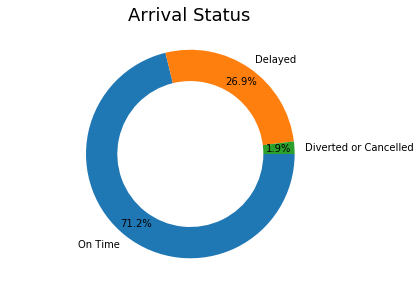

In [24]:

base_color = sns.color_palette()[0]
#sns.palplot(sns.color_palette("Blues"))


# Thanks to https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f
#explosion
# explode = []
# for i in range(len(df['ArrStatus_light'].value_counts())):
#     explode.append(0.05)

df['ArrStatus_light'].value_counts().plot.pie(autopct='%1.1f%%',
                                       wedgeprops = {'width' : 0.3},
                                       startangle = 0,
                                       counterclock = False,
                                       pctdistance=0.85);

ax = plt.gca();
ax.set_title('Arrival Status', fontsize=18, y=1.05);
ax.set_ylabel('');
# # Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout();
# plt.show()

Let's keep only flight and early flight from the dataset.

So we will speed up process time as now we will focus on delayed flights.

In [25]:
#df_late = df.drop(df[df.ArrStatus_light == 'On Time'].index)
df_late = df[df.ArrStatus_light == 'Delayed']

In [26]:
df_late.shape

(1921663, 31)

In [ ]:
df[df['ArrDelay'] < -20].shape[0]

## Check Month

In [90]:


def comparative_histogram_continuous_variable(column_name, binsize = 100, xlabel=''):
    bins = np.arange(df[column_name].min(), df[column_name].max()+binsize, binsize);
    plt.figure(figsize=[8, 5]);
    plt.hist(data = df, x = column_name, bins = bins);
    plt.hist(data = df_late, x = column_name, bins = bins);
    plt.title('Flights count per ' + column_name, fontsize=18);
    xlabel = column_name if xlabel == '' else xlabel
    plt.xlabel(xlabel);
    plt.ylabel('Count');
    plt.show;

def comparative_histogram_categorical_variable(column_name, xlabel=''):
    xlabel = column_name if xlabel == '' else xlabel
    sns.countplot(x=column_name, palette="Blues", data=df);
    sns.countplot(x=column_name, palette="Reds", data=df_late);
    plt.title('Flights count per ' + column_name, fontsize=18);
    plt.xlabel(xlabel, labelpad=16);
    plt.ylabel('Count', labelpad=16);

In [91]:
df_late.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'ArrStatus', 'ArrStatus_light'],
      dtype='object')

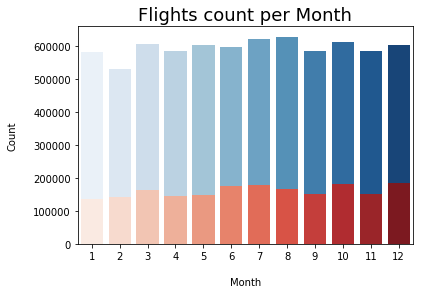

In [92]:
comparative_histogram_categorical_variable('Month');


## DayofMonth

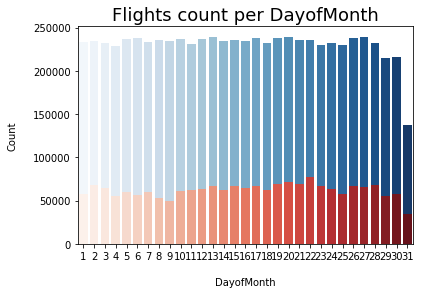

In [71]:
comparative_histogram_categorical_variable('DayofMonth');

## DayOfWeek

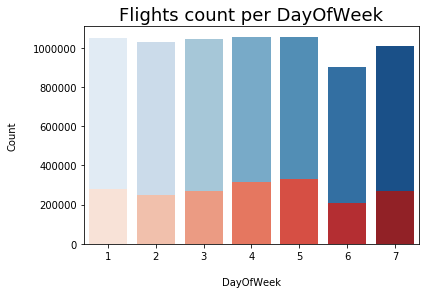

In [72]:
comparative_histogram_categorical_variable('DayOfWeek');

## DepTime

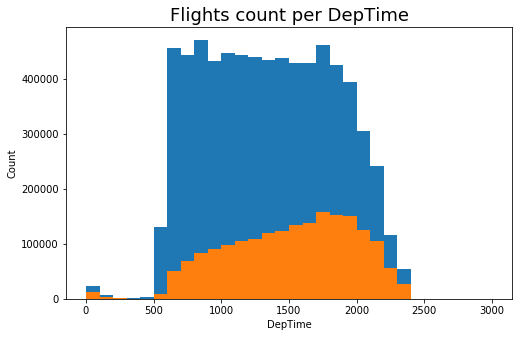

In [93]:
comparative_histogram_continuous_variable('DepTime');

## UniqueCarrier

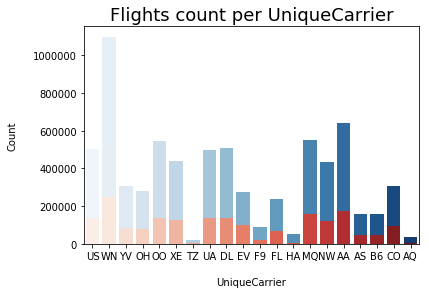

In [74]:
comparative_histogram_categorical_variable('UniqueCarrier')

## 'Origin'

In [75]:
import itertools
vc = df.Origin.value_counts()
print('Number of Origin airport :', len(vc))
print('\n10 mosts used origin airport')
# Thanks to https://stackoverflow.com/questions/36106712/how-can-i-limit-iterations-of-a-loop-in-python
for name, cnt in itertools.islice(vc.iteritems(),0,10):
      print(name, cnt)

Number of Origin airport : 289

10 mosts used origin airport
ATL 407971
ORD 373736
DFW 301163
LAX 233788
DEN 232476
IAH 224061
PHX 215086
LAS 184733
EWR 158291
SLC 142080


## 'Dest', 

In [76]:
import itertools
vc = df.Dest.value_counts()
print('Number of Dest airport :', len(vc))
print('\n10 mosts used Dest airport')
# Thanks to https://stackoverflow.com/questions/36106712/how-can-i-limit-iterations-of-a-loop-in-python
for name, cnt in itertools.islice(vc.iteritems(),0,10):
      print(name, cnt)

Number of Dest airport : 296

10 mosts used Dest airport
ATL 404829
ORD 373799
DFW 301312
LAX 233900
DEN 232365
IAH 224004
PHX 215085
LAS 184716
EWR 158256
SLC 142262


## 'Distance'

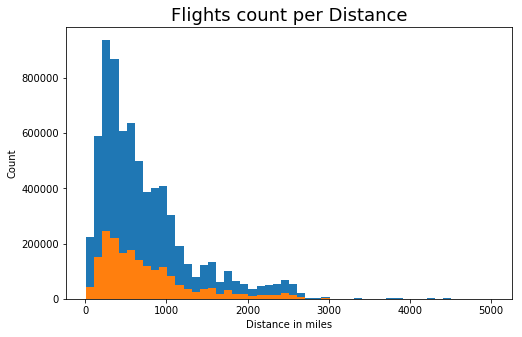

In [94]:
comparative_histogram_continuous_variable('Distance', xlabel='Distance in miles')

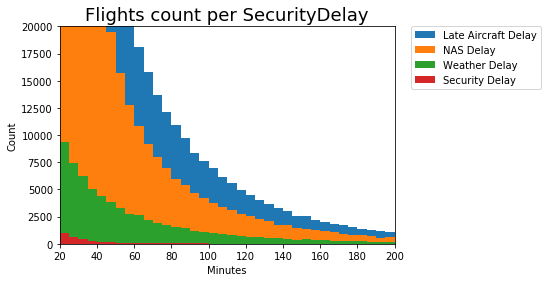

In [115]:
reasons = ['LateAircraftDelay', 'NASDelay', 'WeatherDelay', 'SecurityDelay', ]

def histogram_continuous_variable(column_name, binsize = 100, legend=''):
    bins = np.arange(df[column_name].min(), df[column_name].max()+binsize, binsize);
    #plt.figure(figsize=[8, 5]);
    plt.hist(data = df_late, x = column_name, bins = bins, label=legend);
    plt.title('Flights count per ' + column_name, fontsize=18);
    legend = column_name if legend == '' else legend
    plt.xlabel('Minutes');
    plt.ylabel('Count');
    plt.xlim([20,200]);
    plt.ylim([0,20000]);
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.show;

histogram_continuous_variable('LateAircraftDelay', binsize=5, legend='Late Aircraft Delay')
histogram_continuous_variable('NASDelay', binsize=5, legend='NAS Delay')
histogram_continuous_variable('WeatherDelay', binsize=5, legend='Weather Delay')
histogram_continuous_variable('SecurityDelay', binsize=5, legend='Security Delay')
plt.show;

# import matplotlib.patches as mpatches
# red_patch = mpatches.Patch(color='blue', label='Late Aircraft Delay')
# red_patch = mpatches.Patch(color='orange', label='NAS Delay')
# red_patch = mpatches.Patch(color='green', label='Weather Delay')
# red_patch = mpatches.Patch(color='red', label='Security Delay')
# plt.legend(handles=[red_patch]);


name : ['LateAircraftDelay', 'NASDelay', 'WeatherDelay', 'SecurityDelay']
sum_delay : [32245816, 25610715, 4853843, 221371]


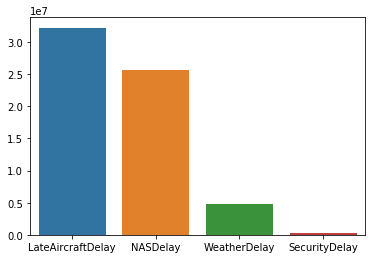

In [120]:

name = []
sum_delay = []
for reason in reasons:
    name.append(reason)
    sum_delay.append(df[reason].sum())
    
pv('name')
pv('sum_delay')

#plt.hist(data = df_late, x = sum_delay, bins = bins, label=legend);
#plt.bar(np.arange(len(reasons)), sum_delay);
#plt.xticks(np.arange(len(reasons)), name);

sns.barplot(x=name, y=sum_delay);

In [109]:
np.arange(4)

array([0, 1, 2, 3])

In [28]:
df_late.Month.value_counts()

12    183863
10    181666
7     177426
6     176805
8     166431
3     162997
11    152478
9     151967
5     147459
4     143621
2     141754
1     135196
Name: Month, dtype: int64

In [ ]:


df_late.plot(x='Month', kind='bar')

In [ ]:
df.plot.bar(x='Cancelled', y='Month', rot=0)

In [ ]:

min_delay = 1000
#df_hight_delay = df[np.isfinite(df['Cancelled'])].query("ArrDelay > @min_delay")

# start with a standard-scaled plot
binsize = 100
bins = np.arange(min_delay, df_hight_delay['ArrDelay'].max()+binsize, binsize);
plt.figure(figsize=[8, 5]);
plt.hist(data = df_hight_delay, x = 'ArrDelay', bins = bins);
plt.xlabel('ArrDelay (min)');
plt.show();


In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(20, 20), diagonal='kde');

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!
The ArrDelay seems clean and tidy



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

To compare delay by Airport we have to compute a new feature that divide delay by number of flights

We could also compute a new feature by computing delay category : low, medium, high and canceled.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [ ]:
Violin plot ?

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

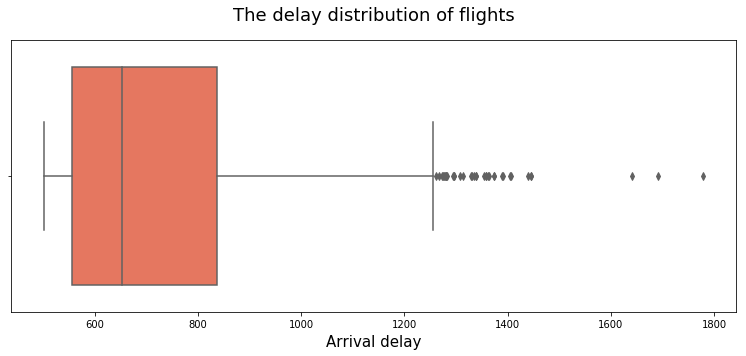

In [14]:

plt.figure(figsize=(13,5));
sns.boxplot(x='ArrDelay', data=df[df['ArrDelay'] > 500], palette='Reds', orient='h');
plt.title("The delay distribution of flights", fontsize=18, y=1.05);
plt.xlabel("Arrival delay", fontsize=15, labelpad=5);
